In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from datetime import datetime
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, UpSampling2D, Dropout,BatchNormalization,GlobalAveragePooling2D
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
#.np_utils

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 6s 0us/step


In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
tuned_model=tf.keras.models.load_model("/content/custom_funetunning.h5")

In [5]:
tuned_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 3)         0         
 g2D)                                                            
                                                                 
 sequential (Sequential)     (None, 256)               224576    
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 64)                16448     
                                                      

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model=tf.keras.models.Sequential()
model.add(UpSampling2D(size=(2, 2),interpolation='bilinear',input_shape=(32,32,3)))
model.add(tuned_model)
model.add(Flatten())
model.add(Dropout(.25))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d (UpSampling2  (None, 64, 64, 3)         0         
 D)                                                              
                                                                 
 sequential_1 (Sequential)   (None, 200)               315624    
                                                                 
 flatten (Flatten)           (None, 200)               0         
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 256)               51456     
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                        

In [7]:
history = model.fit(x_train, y_train, epochs=7, validation_data=(x_test, y_test))

Epoch 1/7
1563/1563 [==============================] - 25s 10ms/step - loss: 1.3992 - accuracy: 0.4978 - val_loss: 1.2475 - val_accuracy: 0.5507
Epoch 2/7
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2320 - accuracy: 0.5654 - val_loss: 1.1772 - val_accuracy: 0.5834
Epoch 3/7
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1527 - accuracy: 0.5974 - val_loss: 1.1462 - val_accuracy: 0.6031
Epoch 4/7
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0959 - accuracy: 0.6194 - val_loss: 1.0747 - val_accuracy: 0.6237
Epoch 5/7
1563/1563 [==============================] - 15s 10ms/step - loss: 1.0475 - accuracy: 0.6410 - val_loss: 1.0832 - val_accuracy: 0.6166
Epoch 6/7
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9997 - accuracy: 0.6558 - val_loss: 1.0375 - val_accuracy: 0.6427
Epoch 7/7
1563/1563 [==============================] - 15s 9ms/step - loss: 0.9685 - accuracy: 0.6678 - val_loss: 1.0140 - val_accu

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy: {:.2f}%".format(test_acc * 100))

313/313 [==============================] - 1s 3ms/step - loss: 1.0140 - accuracy: 0.6539
Test accuracy: 65.39%


In [9]:
train_loss, train_acc=model.evaluate(x_train,y_train)
print("Test accuracy: {:.2f}%".format(train_acc * 100))

1563/1563 [==============================] - 5s 3ms/step - loss: 0.8565 - accuracy: 0.7052
Test accuracy: 70.52%


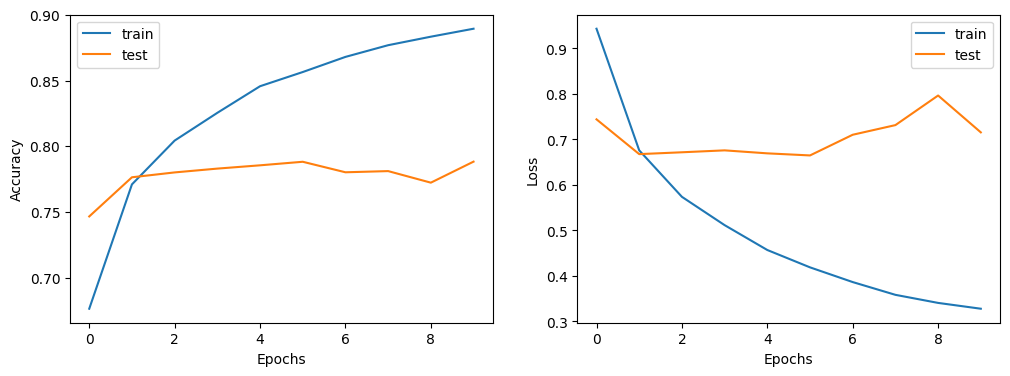

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d (UpSampling2  (None, 64, 64, 3)         0         
 D)                                                              
                                                                 
 sequential_1 (Sequential)   (None, 200)               315624    
                                                                 
 flatten (Flatten)           (None, 200)               0         
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 256)               51456     
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                        

In [12]:
model.save("custom_tuned_model.h5")

ValueError: Unable to create dataset (name already exists)

In [ ]:
model.save("exp1_CNN_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
